<a href="https://colab.research.google.com/github/petrasuk/CADL/blob/master/tensorflow_datasets%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Copyright 2018 The TensorFlow Datasets Authors, Licensed under the Apache License, Version 2.0

In [0]:
!pip install -q tensorflow-datasets tensorflow

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds


import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

# tfds works in both Eager and Graph modes
tf.enable_v2_behavior()

# Construct a tf.data.Dataset
ds = tfds.load('mnist', split='train', shuffle_files=True)

# Build your input pipeline
ds = ds.shuffle(1024).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
k=0
for example in ds.take(10):
  k=k+1
  print(k)
  image, label = example['image'], example['label']

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.0. Subsequent calls will reuse this data.
1
2
3
4
5
6
7
8
9
10


(10000,)
(10000, 28, 28)


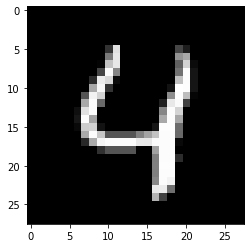

In [0]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(test_labels.shape)
print(test_images.shape)
plt.imshow(test_images[4,:, :].astype(np.float32), cmap=plt.get_cmap("gray"))

(28, 28)
Label: 5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


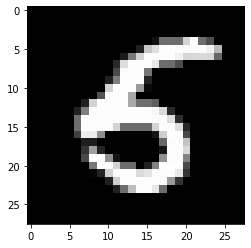

In [0]:
for example in ds.take(1):
  image, label = example['image'], example['label']
  label2 = tf.one_hot(label,10)
  im_np = image.numpy()
  im_np2 = im_np[0,:,:,0]
  print(im_np2.shape)
  plt.imshow(image.numpy()[0,:, :, 0].astype(np.float32), cmap=plt.get_cmap("gray"))
  print("Label: %d" % label[0].numpy())
  print(label2[0].numpy())

In [0]:
print(image.shape)
print(label.shape)

(32, 28, 28, 1)
(32,)


In [0]:
def make_a():
    model = tf.keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(10, activation='softmax'))

    return model

In [0]:
model_a = make_a()
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(1e-4)

In [0]:
def train_step(image, label):

    with tf.GradientTape() as gen_tape:
      model_a_output = model_a(image, training=True)

      loss = cross_entropy(model_a_output,label)
      
    gradients_of_model_a = gen_tape.gradient(loss, model_a.trainable_variables)
    optimizer.apply_gradients(zip(gradients_of_model_a, model_a.trainable_variables))

In [0]:
epochs=10

In [0]:
def train(ds, epochs):
  for epoch in range(epochs):
    start = time.time()

    for example in ds.take(100):
      image, label = example['image'], example['label']
      label2 = tf.one_hot(label, depth=10)
      print(label2.shape)
      print(image.shape)
      train_step(image, label2)

In [0]:
train(ds, epochs)

(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)
(32, 10)
(32, 28, 28, 1)


In [0]:
result = model_a(test_images)

In [0]:
print(result[4])

tf.Tensor(
[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00
 0.000000e+00 0.000000e+00 6.269427e-32 0.000000e+00 0.000000e+00], shape=(10,), dtype=float32)
